# Data Science Fundamentals
## Predicting Fuel Efficiency: A Practical Toy Example with the `Auto MPG` Dataset

© 2025, 2026 Yvan Richard.   
*All rights reserved.*

This notebook introduces core concepts in data science and machine learning through structured exploration of a real-world dataset, focusing on data meaning, structure, and limitations rather than model optimisation.

## Table of Contents
1. <a href = "#part1">Motivation and Scope</a>     
2. <a href = "#part2">Data Loading, Description, and Initial Inspection</a>
3. <a href = "#part3">Exploratory Data Analysis</a>

## <a id = "part1" style = "color: inherit;">1. Motivation and Scope</a>



### 1.1. Data Science and Machine Learning

As outlined in the introduction, the role of a data scientist can be broadly characterised as the extraction of meaningful insights from complex and often imperfect data. When the objective is to understand or predict relationships between variables, this process typically takes the form of *statistical learning* or *machine learning*. In this setting, the analyst seeks to approximate an unknown function $ f $ that maps a set of predictors $ X = \{X_1, X_2, \ldots, X_p\} $ to a response variable $ Y $, up to an irreducible random error term $ \varepsilon $, assumed to be independent of $ X $ and to have zero mean:

$$
Y = f(X) + \varepsilon
$$

This formulation provides a unifying framework for a wide range of predictive and inferential tasks encountered in applied data science.

### 1.2.  The Early Steps

The objective of this notebook is to illustrate the stages that precede formal modelling in a data science or machine learning workflow. In practice, the majority of time and effort in applied projects is not devoted to model estimation, but rather to data acquisition, cleaning, validation, and exploratory data analysis (EDA). These preliminary steps are critical, as they determine both the feasibility of downstream modelling and the reliability of any conclusions drawn from it.

To ground this discussion in a concrete example, this notebook works with the well-known *Auto MPG* dataset, which records technical characteristics of automobiles and their fuel efficiency. While the dataset is modest in size, it exhibits several features typical of real-world data, including measurement heterogeneity, missing values, and variables whose interpretation requires domain understanding.

The analysis deliberately avoids model optimisation or performance evaluation. Instead, the focus is on developing intuition about the data-generating process, understanding the meaning and limitations of the available variables, and identifying potential challenges that must be addressed before any modelling exercise can be undertaken. In doing so, the notebook aims to provide a simplified but representative illustration of how the early stages of a data mining or machine learning pipeline are typically structured in practice.

## <a id = "part2" style = "color: inherit;"> 2. Data Loading, Description, and Initial Inspection</a>

### 2.1. Data Loading

The first step in any data science workflow consists of loading the raw dataset and performing an initial inspection. At this stage, the objective is not to transform or clean the data, but rather to understand its basic structure, scale, and content. This includes identifying the number of observations and variables, examining variable names, and verifying that the data has been imported correctly.

Such an initial inspection serves two purposes. First, it provides a coarse understanding of the dataset and its dimensionality, which has direct implications for downstream modelling choices. Second, it allows the analyst to detect obvious issues early on, such as unexpected data types, encoding problems, or missing values that may not be immediately apparent.

In what follows, the *Auto MPG* dataset is loaded in its raw form and examined using simple descriptive tools.

In [11]:
# essential libraries for data manipulation and visualization
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for enhanced visualizations

# loading the original auto mpg dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
data = auto_mpg.data.original
  
# metadata
print("Dataset Metadata:")
print(auto_mpg.metadata)

# convert to a single DataFrame for easier manipulation
data = pd.DataFrame(data)

# display first few rows of the dataset
data.head()

Dataset Metadata:
{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unk

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


**Data Loading Procedure**

As the code indicates, this data set is loaded in its original version according to the instructions provided by UC Irvine who repertoriates numerous famous machine learning datasets on their <a href = "https://archive.ics.uci.edu/datasets">website</a>. Usually, the data acquisition part is far more tedious than what we just did. Indeed, it is the role of *data engineers* to create efficient pipeline to pool a large amount amount of data from various sources and organize them cleanly/efficiently in a database, read-to-use for the data scientist. Furthermore, if the API used above does not work properly, you may find a slightly different version of the data set in the [data directory](data/) of this sub-project.

### 2.2. Data Description

Once the data have been collected and stored, the data scientist proceeds to examine them in order to understand what they represent, the information they contain, and the frequency at which they are observed. This data description step consists in systematically characterizing each variable in the dataset and clarifying its meaning, scale, and temporal structure.

In [12]:
# basic structure of the dataset
print("\nDataset Structure:")
print(data.info())


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None


The data.info() function is particularly useful for obtaining an initial overview of a dataset’s structure. It provides a concise summary of all variable names, the number of non-null observations for each variable, and their associated data types, while reminding the analyst to verify how missing values are encoded (in the present case, they are encoded as `NaN`, thus are detected by the function `data.info()`).

**Variables Description**

*Official documentation*

> This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute.  The original dataset is available in the file "auto-mpg.data-original".
> 
> The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)"

This is already very informative. The business case we face is to predict the miles per gallon (mpg) / fuel efficiency of a particular car model according to 3 multivalued discrete variables and 5 continuous real variables. The variables are described more carefully below:

| Variable        | Type      | Description                                                                 |
|-----------------|-----------|-----------------------------------------------------------------------------|
| `car_name`      | object    | Textual identifier of the vehicle. This variable uniquely labels observations but does not carry numerical meaning. |
| `cylinders`     | int64     | Discrete numerical variable indicating the number of cylinders in the engine. Takes a small set of integer values. |
| `displacement`  | float64   | Continuous numerical variable measuring engine size. Larger values indicate larger engines. |
| `horsepower`    | float64   | Continuous numerical variable representing engine power. Contains missing values, which must be addressed during preprocessing. |
| `weight`        | int64     | Numerical variable indicating the mass of the vehicle. |
| `acceleration` | float64   | Continuous variable measuring the time needed for the vehicle to reach a given speed. Higher values correspond to slower acceleration. |
| `model_year`    | int64     | Integer variable indicating the production year of the vehicle. Can be treated as ordinal or temporal. |
| `origin`        | int64     | Categorical variable encoded as integers. It represents the country of origin |
| `mpg`           | float64   | Continuous numerical variable measuring fuel efficiency in miles per gallon. **target variable** |

Of course, a deeper undertstanding of all the variables would require more expertise and attention but since it is only a small showcase project, we accomodate the brevity of the explanations.

### 2.3. Missing Values

Before the exploratory data analysis (EDA) phase, we examine which variable present missing values and we briefly talk about **imputation strategies**.

In [13]:
# missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
car_name        0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


**Handling Missing Values is a Delicate Matter!**

As shown, only a single variable—`horsepower`—contains missing observations, representing approximately 1.5% of the sample. This setting is deliberately simplistic; in real-world applications, data acquisition and preprocessing are typically far more complex and time-consuming. Nevertheless, this example suffices to introduce core methodological issues in data science.

Once missingness has been identified, a critical question concerns its underlying mechanism: why are these values missing, and does their absence convey information about the response variable $y$ (here, `mpg`)? These considerations are central to sound empirical analysis, yet they are often difficult to address in practice due to limited knowledge of the data-generating or recording process. In particular, assumptions commonly invoked at this stage, such as "*missingness occurring completely at random*", can be problematic, especially in causal settings, as they may undermine both the statistical validity and theoretical credibility of the results. Consequently, the treatment of missing data should be regarded as a substantive modelling decision rather than a purely mechanical preprocessing step.

**Methods for Handling Missing Values**

[Emmanuel et al. (2021, p. 1)](documentation/Emmanuel_et_al_2021.pdf) explain that "the seriousness of missing values depend in part on how much data is missing, the pattern of missing data, and the
mechanism underlying the missingness of the data". In their paper *A survey on missing data in machine
learning*, they identify several techniques for handling missing values.

They review missing-data handling methods by organizing them along increasing levels of statistical and algorithmic sophistication, with a clear emphasis on imputation-based approaches. At the most basic level, the authors discuss **deletion strategies**, including **listwise deletion** (every case that has one or more missing values is removed) and pairwise deletion (less restrictive but generally not favoured). While computationally simple, these methods are shown to be statistically valid only under the strong assumption that data are **missing completely at random (MCAR)**.

---

Let $X \in \mathbb{R}^{n \times p}$ denote the feature matrix, and let $x_i \in \mathbb{R}^p$ be the $i$-th observation.
Define a row-level missingness indicator $m_i$ as

$$
m_i =
\begin{cases}
0, & \text{if all entries in } x_i \text{ are observed}, \\
1, & \text{if at least one entry in } x_i \text{ is missing}.
\end{cases}
$$

The data are said to be **Missing Completely at Random (MCAR)** if the probability that an observation is incomplete
does not depend on the values of the variables in that observation (nor on any other data values), that is

$$
P(m_i \mid x_i) = P(m_i).
$$

Equivalently, missingness is statistically independent of the data-generating process for $X$.
Under MCAR, the observed sample forms an unbiased subsample of the full dataset.

---


In most practical settings, this assumption is implausible, and deletion can therefore induce biased estimates and substantial information loss, especially when missingness is systematic or the sample size is limited. **However, at this stage the reader must make a clear distinction between a machine learning based approach (causal links are not discussed) or an inference appraoch where assumptions credibility do matter!**

The paper then examines single-imputation techniques, where missing values are replaced by a single estimated quantity. Simple imputations such as mean, median, or mode substitution are commonly used as baseline methods due to their ease of implementation (this is what we do here), but they are criticized for distorting the marginal distributions of variables, attenuating variance, and biasing downstream analyses. **Regression-based imputation** improves on this by exploiting relationships between variables, replacing missing values with conditional predictions derived from observed data.

A substantial portion of the survey is also devoted to **machine-learning-based imputation methods**. Distance-based approaches such as $k$-nearest neighbors (KNN) imputation estimate missing values using local similarity in feature space and are flexible across data types, but they are computationally expensive and may introduce spurious associations. Tree-based methods, particularly random-forest imputation (e.g. `missForest`), iteratively predict missing values using ensembles of decision trees and are shown to perform well in nonlinear and mixed-type data without strong distributional assumptions.

Overall, we understand that plenty of approaches exist but we must be careful that the one we select respect the scope and assumptions of our project.

**Mean Based Imputation with `Auto MPG`**

In our case, we select an easy appraoch, namely mean based imputation, which means that missing values are replaced by the mean of the distribution of the feature `horsepower`. I do not use the most efficient approach but rather choose one where the process is explicit:

In [14]:
# mean based imputation for 'horsepower' column
data['hp_missing'] = data['horsepower'].isnull().astype(int)  # indicator for missingness 0 or 1

# using numpy to compute mean
mean_hp = np.nanmean(data['horsepower'])

# np.where(condition, value_if_true, value_if_false) -> vectorized form of conditional assignment
data['horsepower'] = np.where(data['hp_missing'] == 1, mean_hp, data['horsepower'])

# verify no missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
car_name        0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
hp_missing      0
dtype: int64


We have finally *cleaned* the `Auto MPG` data set. Now that this is done, we move to a part called exploratory data analysis (EDA).

## <a id = "part3" style = "color: inherit;"> 3. Exploratory Data Analysis</a>

**The Role of EDA**

As [Behrens (1997, p. 132)](documentation/Behrens1997EDA.pdf) states, "the goal of EDA is to discover patterns in data […] until a plausible story of the data is apparent".
During EDA, the researcher systematically examines the data to identify regularities, assess relationships, and formulate tentative hypotheses, whether or not these are initially grounded in formal theory. This stage plays a critical role in subsequent phases of a machine learning project. First, it facilitates the identification of features $x_i \in X$ that exhibit linear or non-linear associations with the target variable $y$, thereby providing insight into their potential predictive relevance. Second, an improved understanding of interdependencies among variables informs the design of meaningful transformations during feature engineering and data scaling. Ultimately, predictive performance depends not only on model choice, but also on the extent to which insights gained during this exploratory phase are effectively incorporated into the modelling process.

**How to Structure an EDA?**

A rigorous EDA is typically structured from broad diagnostic checks to progressively more targeted investigations. It begins with data auditing (verifying data types, units, missingness patterns, duplicates, and obvious inconsistencies; we already completed this step) followed by **univariate summaries** (studying the variables in isolation) that characterize each variable’s distribution (central tendency, dispersion, skewness, outliers) and assess whether transformations may be required. The analysis then moves to bivariate and multivariate exploration to examine associations between predictors and the target, detect non-linearities, interactions, and confounding, and evaluate collinearity and redundancy among features. Throughout, we should document each finding as a testable hypothesis or modelling implication (e.g., candidate features, transformations, segmentation, or robustness checks), while ensuring that all exploratory steps respect the eventual evaluation design (e.g., avoiding leakage by computing summaries using only training data when relevant).

**EDA with `Auto MPG`**

In this subsection, I perform a brief EDA to display some useful plotting techniques with `Matplotlib` and `Seaborn`. As indicated above, I start with a univariate exploration and proceed further with multivariate exploration.

### 3.1. Univariate EDA

First, it is always interesting to compute the **summary statistics** of the numerical features (note that I do not perform a data split yet but this won't introduce data leakage). This steps allow us to detect gross anomalies in the data (e.g. negative values for `horsepower`, ...).

In [ ]:
# summary statistics of the dataset
print("\nSummary Statistics:")
df_sum_stats = data.describe().T # I use .T (transpose) for better readability
df_sum_stats


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
hp_missing,398.0,0.015075,0.122006,0.0,0.000,0.0,0.000,1.0


This first inspection does not reveal any specific anomalies in the data but already provides useful insights:

- `model_year`: the examination period goes from 1970 to 1982.
- `origin`: the cars originate from three countries / regions
- `displacement`: this variable seems widely dispersed around its mean.

**The Histogram Plot**

The histogram plot is a classic plot that allows us to apprehend the empirical distribution of a variable. At this stage, I also note that I usually opt for a minimalistic style for my plots (e.g. no useless text or color) and I encourage the reader to do the same. Indeed, the readability of a plot is crucial when we want to transmit convincingly information about our data and the literature encourages to maximize the data information / ink ratio! It is also important to maintain a consistent plotting style.

Below, I produce some histogram plots.

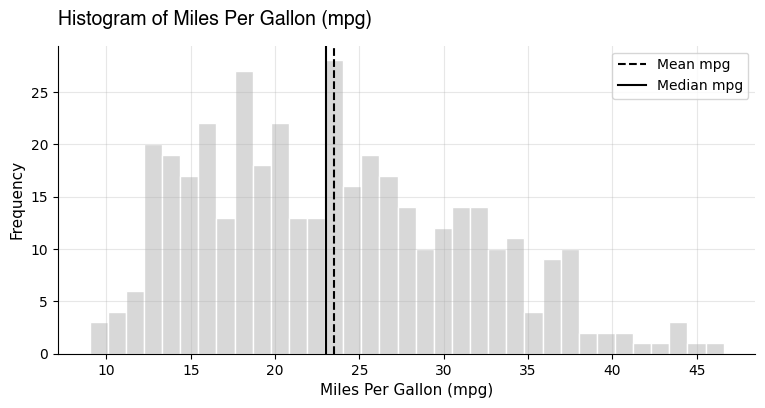

In [ ]:
# histogram of 'mpg' (miles per gallon)
fig, ax = plt.subplots(figsize=(9, 4))

# histogram plot (bins define the number of bars in the histogram, i.e. the granularity of the distribution)
sns.histplot(data['mpg'], bins=35, kde=False, color='grey', edgecolor='white', alpha = 0.3, ax=ax)
ax.axvline(data['mpg'].mean(), color='black', linestyle='--', linewidth=1.5, label='Mean mpg')
ax.axvline(data['mpg'].median(), color='black', linestyle='-', linewidth=1.5, label='Median mpg')
ax.legend()

# customizing the plot
ax.set_title('Histogram of Miles Per Gallon (mpg)',
             family = "Helvetica", fontsize=14, loc = 'left', pad = 15)
ax.set_xlabel('Miles Per Gallon (mpg)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.grid(alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# show the plot
plt.show()

In my humble opinion, the above plot is a nice example of a minimal and polished design. On the interpretation side, nothing particular stands out here: no extreme outliers, not a particular shape for the distribution (roughly centered around its mean like a Gaussian). We can produce hisograms for the others continuous real variables:

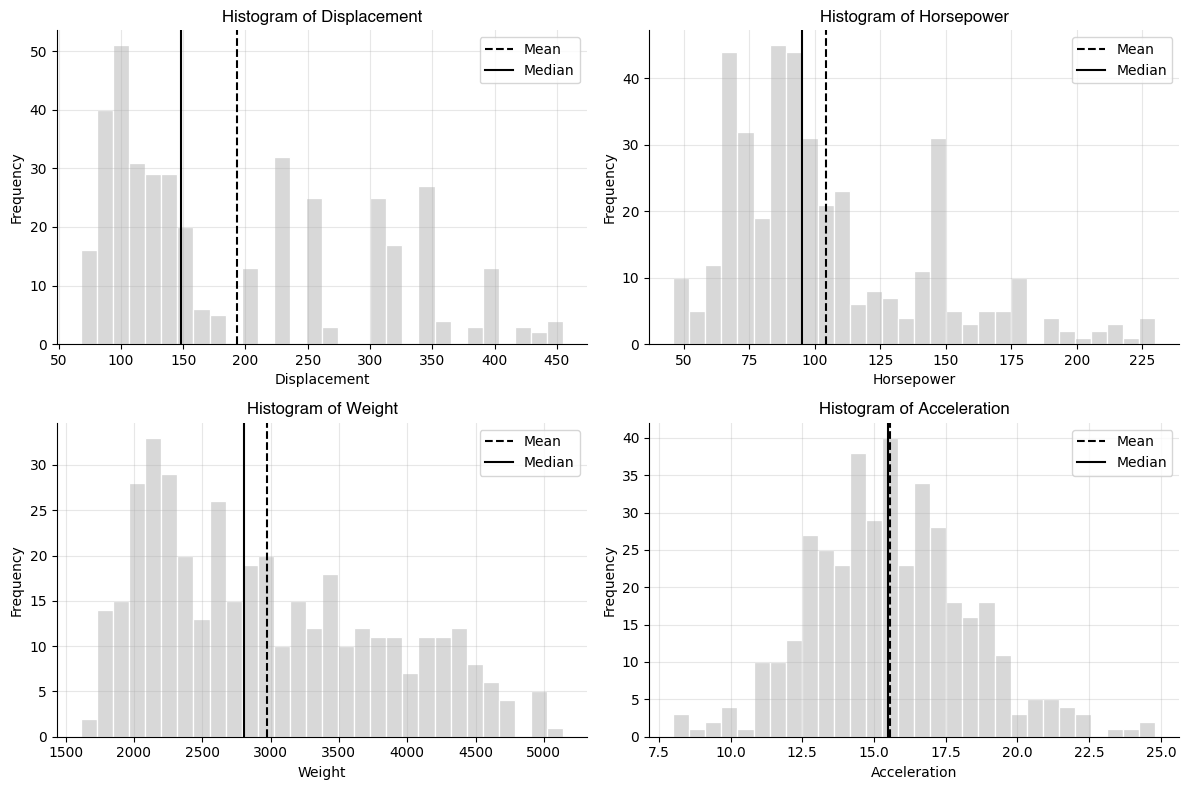

In [42]:
# selected variables
selected_vars = ['displacement', 'horsepower', 'weight', 'acceleration']

# histograms for selected variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# I use a loop to avoid code repetition
for i, var in enumerate(selected_vars):
    sns.histplot(data[var], bins=30, kde=False, color='grey', edgecolor='white', alpha=0.3, ax=axes[i])
    axes[i].axvline(data[var].mean(), color='black', linestyle='--', linewidth=1.5, label='Mean')
    axes[i].axvline(data[var].median(), color='black', linestyle='-', linewidth=1.5, label='Median')
    axes[i].set_title(f'Histogram of {var.capitalize()}', family="Helvetica", fontsize=12)
    axes[i].set_xlabel(var.capitalize(), fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].legend()
    axes[i].grid(alpha=0.3)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

As expected from the summary statistics, the variable `displacement` display a wide dispersion. On the other hand, `acceleration` reminds us of a Gaussian since the median and mean are almost confounded and its distribution is heavily centered around them. Overall, the conclusion is that all those variables will need some data scaling for more efficient modelling (more on this later).

**The Box Plot**

**TO BE CONTINUED**

### 3.2. Bivariate EDA

## References

- Behrens, J. T. (1997). Principles and procedures of exploratory data analysis. *Psychological methods*, 2(2), 131.

- Emmanuel, T., Maupong, T., Mpoeleng, D., Semong, T., Mphago, B., & Tabona, O. (2021). A survey on missing data in machine learning. *Journal of Big data*, 8(1), 140.